# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>
Luca Maria Colombo Gomez - Matr: 934049

Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$

First, the metropolis step is set to have an acceptance ratio $\sim$ 50%. This is achieved testing various steps length in the range 0.5 / 5, using a bisection algorithm until the desired acceptance ratio is reached.

The steps used are 1.34375 for the 1s state, and 3.59375 for the 2p state

### Equilibration

The two states are sampled for 2000 steps, using two starting points, one close and one far from the origin, to study the equilibration steps needed.

The closer point is at (1,0,0), while the far one is at (100,100,100). The coordinates and the distance shown in all the plots are in a0 units.

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

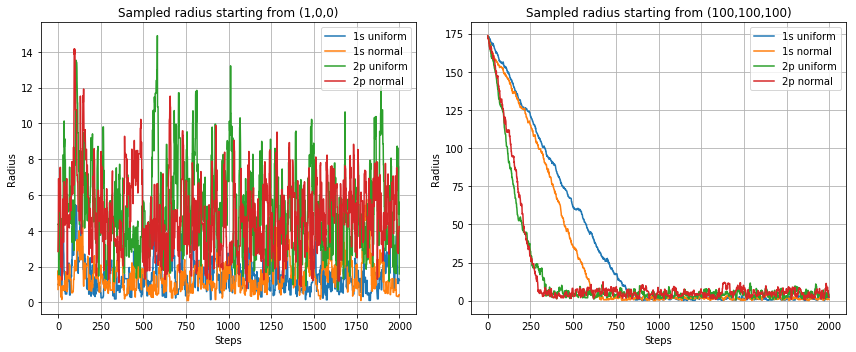

In [89]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

radius_raw = np.loadtxt("5.1/data/r_close.out")
axes[0].plot(radius_raw)
axes[0].set_title("Sampled radius starting from (1,0,0)")

radius_raw = np.loadtxt("5.1/data/r_far.out")
axes[1].plot(radius_raw)
axes[1].set_title("Sampled radius starting from (100,100,100)")

for ax in axes:
    ax.set_xlabel("Steps")
    ax.set_ylabel("Radius")
    ax.grid(True)
    ax.legend(["1s uniform", "1s normal", "2p uniform", "2p normal"])

fig.tight_layout()
plt.show()

The plot shows that 1000 steps should be enough to equilibrate the system even if the starting point is far from the origin. 

### Block size

The previous sampling, with the system now equilibrated, is continued for another 1000 steps, and the optimal block size can be chosen studying the autocorrelation factor of the data.

In [78]:
def autocovariance(data, lag):
    n = len(data)
    mean = 0
    for x in data:
        mean += x
    mean /= n
    cov = 0
    for i in range(n - lag):
        cov += (data[i] - mean)*(data[i + lag] - mean)
    return cov / n

def autocorrelation(data, lag):
    return autocovariance(data, lag) / autocovariance(data, 0)

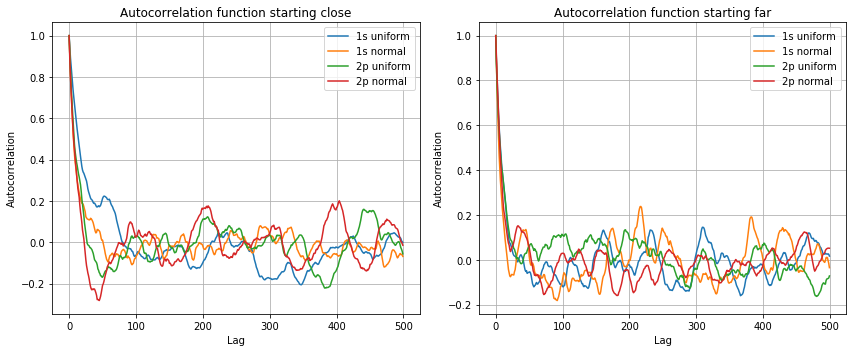

In [87]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()
lag = 500
    
r_close = np.loadtxt("5.1/data/r_close_eq.out", unpack = True)

for dataset in r_close:
    axes[0].plot([autocorrelation(dataset, l) for l in range(lag)])
axes[0].set_title("Autocorrelation function starting close")

r_far = np.loadtxt("5.1/data/r_far_eq.out", unpack = True)

for dataset in r_far:
    axes[1].plot([autocorrelation(dataset, l) for l in range(lag)])
axes[1].set_title("Autocorrelation function starting far")

for ax in axes:
    ax.grid(True)
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.legend(["1s uniform", "1s normal", "2p uniform", "2p normal"])

fig.tight_layout()
plt.show()

Looking at the graphs, i choose a block size of 100.

### Radius evaluation

Finally, using the parameters found the previous analysis, it's possible to draw an estimate of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ with the respective uncertainties, using the data blocking method with M = $10^6$ throws, and a block size of 100. 
Since the system now it's equilibrated, i dont make two different simulations starting close and far, but just one.

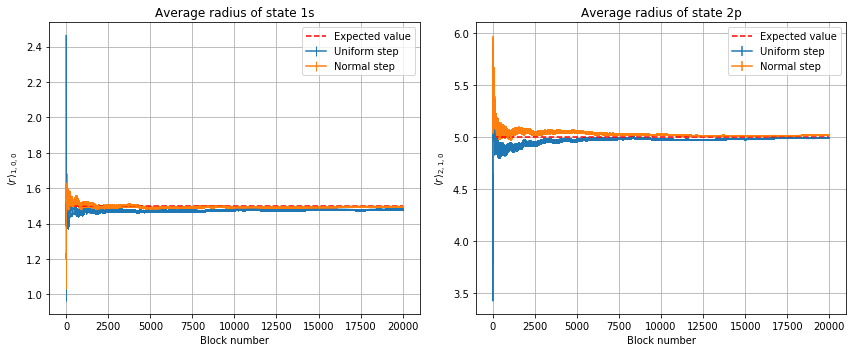

In [80]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

r_1s = np.loadtxt("5.1/data/r_av_1s.out", unpack = True)
r_1s_g = np.loadtxt("5.1/data/r_av_1s_g.out", unpack = True)
x = range(len(r_1s[0]))

axes[0].errorbar(x, r_1s[0], yerr = r_1s[1], label = "Uniform step",elinewidth = 1)
axes[0].errorbar(x, r_1s_g[0], yerr = r_1s_g[1], label = "Normal step", elinewidth = 1)
axes[0].hlines(3/2,0,len(r_1s[0])-1,colors = "red", linestyle = "dashed", label = "Expected value")  

axes[0].set_title("Average radius of state 1s")
axes[0].set_ylabel(r"$\langle r\rangle_{1,0,0}$")
axes[0].set_xlabel("Block number")
axes[0].legend()
axes[0].grid(True)

r_2p = np.loadtxt("5.1/data/r_av_2p.out", unpack = True)
r_2p_g = np.loadtxt("5.1/data/r_av_2p_g.out", unpack = True)
x = range(len(r_2p[0]))

axes[1].errorbar(x, r_2p[0], yerr = r_2p[1], label = "Uniform step")
axes[1].errorbar(x, r_2p_g[0], yerr = r_2p_g[1], label = "Normal step")
axes[1].hlines(5,0,len(r_2p[0])-1,colors = "red", linestyle = "dashed", label = "Expected value")  

axes[1].set_title("Average radius of state 2p")
axes[1].set_ylabel(r"$\langle r\rangle_{2,1,0}$")
axes[1].set_xlabel("Block number")
axes[1].legend()
axes[1].grid(True)

fig.tight_layout()
plt.show()

The final estimates are the following, in $a_0$ units


<table>
    <tr>
        <th style="text-align: center"></th>
        <th style="text-align: center">$\langle r\rangle_{1,0,0}$</th>
        <th style="text-align: center">$\langle r\rangle_{2,1,0}$</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Expected value</th>
            </tr>
            <tr>
                <th>Uniform sampling</th>
            </tr>
            <tr>
                <th>Normal sampling</th>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <td style="text-align: center">1.5</td>
            </tr>
            <tr>
                <td>1.483 $\pm$ 0.004</td>
            </tr>
            <tr>
                <td>1.496 $\pm$ 0.004</td>
            </tr>
            </table></td>
        <td><table>
            <tr>
                <td style="text-align: center">5.0</td>
            </tr>
            <tr>
                <td>4.99 $\pm$ 0.01</td>
            </tr>
            <tr>
                <td>5.02 $\pm$ 0.01</td>
            </tr>
            </table></td>
    </tr>
</table>

Both the sampling methods show good compatibility with the expected value and with each other.


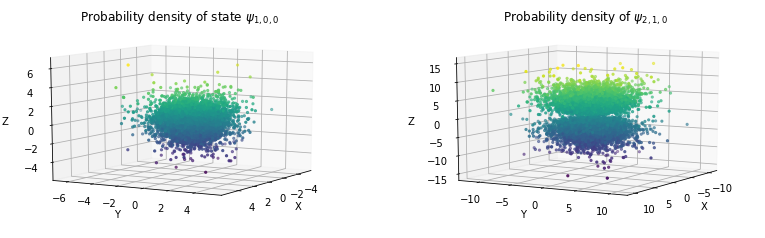

In [90]:
fig = plt.figure(figsize = plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1, projection = "3d")
x, y, z = np.loadtxt("5.1/data/points_1s.out", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"Probability density of state $\psi_{1,0,0}$")
ax.view_init(10, 30)

ax = fig.add_subplot(1, 2, 2, projection = "3d")
x, y, z = np.loadtxt("5.1/data/points_2p.out", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"Probability density of $\psi_{2,1,0}$")
ax.view_init(10, 30)

plt.show()